### MNIST using MLP and Transfer Learning

The task of this assignment is to train a MLP model on MNIST classification. The second task is to use transfer learning (or re-training) to train another model for a letter classification task.

**important**: before turning in your final notebook for grading, make sure to make a "clean" run. Choose "Restart & Run All" from the "Kernel" pulldown menu. The indices of runs must be sequential and start with 1

**important**: rename the notebook with your UID as the prefix, such as jdoe001_xxxxxxx.ipynb, and put your name below

**Name**: Nikhil Kumar Bhavani

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transform
import torch.utils as utils
import random

In [2]:
# Define the transformations: ToTensor and Normalize
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

In [3]:
## load MNIST
train_data = torchvision.datasets.MNIST('./data',download=True, transform=transform)
test_data = torchvision.datasets.MNIST('./data', train=False, transform=transform)
num_classes = len(train_data.classes)
print(train_data)
print(test_data)
print("Number of classes = {0:d}".format(num_classes))

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Number of classes = 10


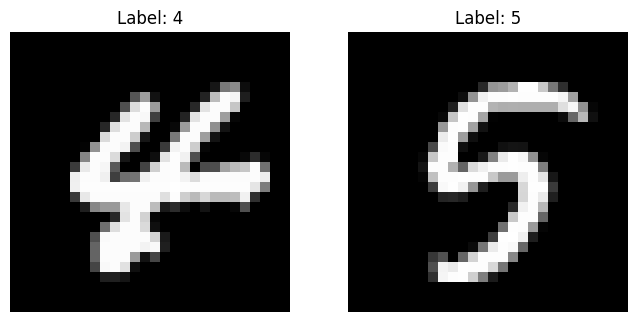

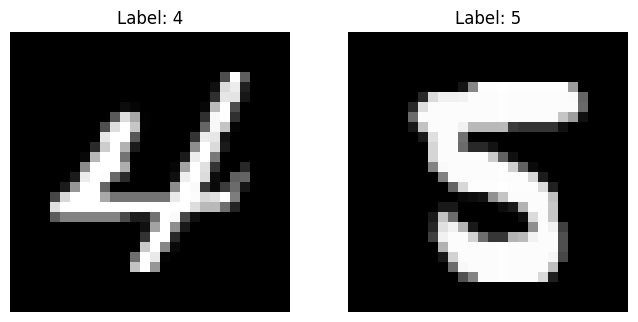

In [4]:
## visualization
##
## TO BE IMPLEMENTED
def visualize_selected_images(dataset, selected_labels):
    plt.figure(figsize=(8, 8))
    for i, label in enumerate(selected_labels, 1):
        # Filter images by label
        filtered_indices = [idx for idx, (_, target) in enumerate(dataset) if target == label]
        # Randomly select an image
        selected_index = random.choice(filtered_indices)
        image, label = dataset[selected_index]
        plt.subplot(2, 2, i)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

# Selected labels to visualize
selected_labels = [4, 5]

# Visualize selected labels from training set
visualize_selected_images(train_data, selected_labels)

# Visualize selected labels from test set
visualize_selected_images(test_data, selected_labels)


In [5]:
## hyperparameters
##
## After hyperparameter turning, replace with your best values here

input_size = 28*28  #Size of image
num_classes = num_classes  #the image number are in range 0-10
num_epochs = 12 #one cycle through the full train data
batch_size = 100 #sample size consider before updating the model’s weights
learning_rate = 0.1  #step size to update parameter
num_hidden = 120 ## width of hidden layers

In [6]:
## create dataloaders

## TO BE IMPLEMENTED
## copy from the previous quiz
train_loader = utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

In [7]:
## define the MLP model

## Dropout layers MUST be used
##

class MLP(nn.Module):
  def __init__(self, input_size, num_hidden, num_classes):
        super(MLP, self).__init__()
        # First fully connected layer
        self.fc1 = nn.Linear(input_size, num_hidden)
        # Dropout layer with dropout probability of 0.5
        self.dropout1 = nn.Dropout(0.5)
        # Second fully connected layer
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        # Second dropout layer
        self.dropout2 = nn.Dropout(0.5)
        # Output layer
        self.fc3 = nn.Linear(num_hidden, num_classes)

  def forward(self, x):
        # Flatten the input x keeping the batch dimension
        x = x.view(-1, input_size)
        # Apply first fully connected layer with ReLU activation function
        x = F.relu(self.fc1(x))
        # Apply first dropout layer
        x = self.dropout1(x)
        # Apply second fully connected layer with ReLU activation function
        x = F.relu(self.fc2(x))
        # Apply second dropout layer
        x = self.dropout2(x)
        # Apply output layer
        x = self.fc3(x)
        return x


In [8]:
## set up loss function and optimizer

model =  MLP(input_size=input_size, num_hidden=num_hidden, num_classes=num_classes)
loss = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(model.parameters(),lr=learning_rate)

In [9]:
## training of MNIST model

## TO BE IMPLEMENTED

## IMPORTANT: the testing accuracy must be > 95%!
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        # Assuming images and labels are already prepared for processing
        # Forward pass
        outputs = model(images)
        loss_m = loss(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss_m.backward()
        optimizer.step()

        if (i+1) % 200 == 0:  # Log every 200th iteration
            print('Iteration: {}, training loss = {:.3f}'.format(i+1, loss_m.item()))

    # Testing the model after each epoch
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print('==> Epoch: {}, test accuracy = {:.3f}'.format(epoch, accuracy))


print('Final Accuracy = {0:.2f}%'.format(accuracy))

Iteration: 200, training loss = 0.912
Iteration: 400, training loss = 0.389
Iteration: 600, training loss = 0.501
==> Epoch: 0, test accuracy = 90.400
Iteration: 200, training loss = 0.387
Iteration: 400, training loss = 0.347
Iteration: 600, training loss = 0.248
==> Epoch: 1, test accuracy = 93.130
Iteration: 200, training loss = 0.302
Iteration: 400, training loss = 0.320
Iteration: 600, training loss = 0.336
==> Epoch: 2, test accuracy = 94.300
Iteration: 200, training loss = 0.387
Iteration: 400, training loss = 0.569
Iteration: 600, training loss = 0.343
==> Epoch: 3, test accuracy = 95.050
Iteration: 200, training loss = 0.285
Iteration: 400, training loss = 0.293
Iteration: 600, training loss = 0.388
==> Epoch: 4, test accuracy = 95.000
Iteration: 200, training loss = 0.185
Iteration: 400, training loss = 0.422
Iteration: 600, training loss = 0.312
==> Epoch: 5, test accuracy = 95.560
Iteration: 200, training loss = 0.355
Iteration: 400, training loss = 0.183
Iteration: 600, tr

In [10]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([120, 784])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([120, 120])
fc2.bias 	 torch.Size([120])
fc3.weight 	 torch.Size([10, 120])
fc3.bias 	 torch.Size([10])


In [11]:
## save model for later use
torch.save(model.state_dict(), './mlp_mnist.pt')

In [12]:
!ls -al *.pt

-rw-r--r-- 1 root root 442268 Feb 29 07:41 mlp_mnist.pt


In [13]:
## Now we load the letters from EMNIST
## use split="letters"

## TO BE IMPLEMENTED
train_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)
num_classes1 = len(train_dataset.classes)

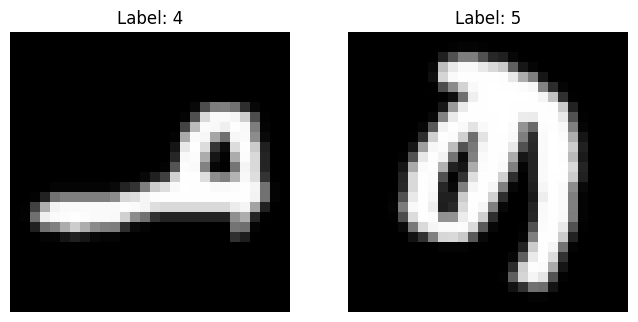

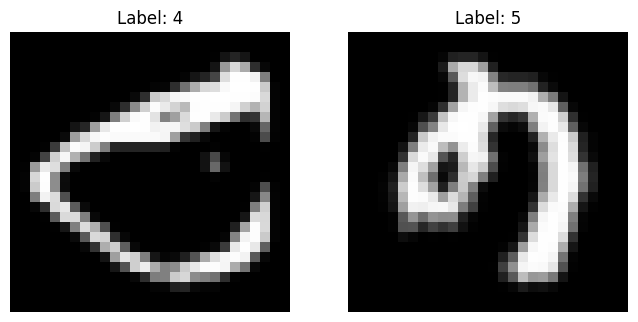

In [14]:
## visualize new dataset

def visualize_selected_images(dataset, selected_labels):
    plt.figure(figsize=(8, 8))
    for i, label in enumerate(selected_labels, 1):
        # Filter images by label
        filtered_indices = [idx for idx, (_, target) in enumerate(dataset) if target == label]
        # Randomly select an image
        selected_index = random.choice(filtered_indices)
        image, label = dataset[selected_index]
        plt.subplot(2, 2, i)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

# Selected labels to visualize
selected_labels = [4, 5]

# Visualize selected labels from training set
visualize_selected_images(train_dataset, selected_labels)

# Visualize selected labels from test set
visualize_selected_images(test_dataset, selected_labels)


In [15]:
## we define a new model and load from saved weights
model_emnist = MLP(input_size=input_size, num_hidden=num_hidden, num_classes=num_classes)
model_emnist.load_state_dict(torch.load('./mlp_mnist.pt'))

<All keys matched successfully>

In [16]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_emnist.state_dict():
    print(param_tensor, "\t", model_emnist.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([120, 784])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([120, 120])
fc2.bias 	 torch.Size([120])
fc3.weight 	 torch.Size([10, 120])
fc3.bias 	 torch.Size([10])


In [17]:
## modify the new MLP model for the new task
## and print
## TO BE IMPLEMENTED

input_size = 28*28  #Size of image
num_classes = num_classes1
num_epochs = 12 #one cycle through the full train data
batch_size = 100 #sample size consider before updating the model’s weights
learning_rate = 0.125 #step size to update parameter
num_hidden = 120 ## width of hidden layers

# Instantiate the modified model
model_emnist = MLP(input_size, num_hidden, num_classes)
loss = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(model_emnist.parameters(),lr=learning_rate)

print("Model's state_dict:")
for param_tensor in model_emnist.state_dict():
    print(param_tensor, "\t", model_emnist.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([120, 784])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([120, 120])
fc2.bias 	 torch.Size([120])
fc3.weight 	 torch.Size([27, 120])
fc3.bias 	 torch.Size([27])


In [18]:
## build the new data loader

## TO BE IMPLEMENTED
train_loader1 = utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader1 = utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
print(test_loader1)

In [19]:
## do an inference on the pre-trained model
model_emnist.eval()  # Set the model to evaluation mode


with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader1:  # Assuming test_loader is your DataLoader for the test set
        # If your model expects a different input size (e.g., flattened vector), adjust accordingly
        outputs = model_emnist(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_score = 100 * correct / total
print('Final Accuracy = {:.2f}%'.format(accuracy_score))

Final Accuracy = 2.48%


In [20]:
## now we retrain the model with the new data

## TO BE IMPLEMENTED

## The final accuracy must be > 90%!
for epoch in range(num_epochs):
    model_emnist.train()
    for i, (images, labels) in enumerate(train_loader1):
        # Assuming images and labels are already prepared for processing
        # Forward pass
        outputs = model_emnist(images)
        loss_e = loss(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss_e.backward()
        optimizer.step()

        if (i+1) % 200 == 0:  # Log every 200th iteration
            print('Iteration: {}, training loss = {:.3f}'.format(i+1, loss_e.item()))

    # Testing the model after each epoch
    model_emnist.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader1:
            outputs = model_emnist(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print('==> Epoch: {}, test accuracy = {:.3f}'.format(epoch, accuracy))


print('Final Accuracy = {0:.2f}%'.format(accuracy))

Iteration: 200, training loss = 2.219
Iteration: 400, training loss = 1.661
Iteration: 600, training loss = 1.680
Iteration: 800, training loss = 1.513
Iteration: 1000, training loss = 1.418
Iteration: 1200, training loss = 1.382
Iteration: 1400, training loss = 1.792
Iteration: 1600, training loss = 1.145
Iteration: 1800, training loss = 1.114
==> Epoch: 0, test accuracy = 70.938
Iteration: 200, training loss = 1.033
Iteration: 400, training loss = 1.327
Iteration: 600, training loss = 1.143
Iteration: 800, training loss = 1.400
Iteration: 1000, training loss = 1.218
Iteration: 1200, training loss = 1.218
Iteration: 1400, training loss = 1.545
Iteration: 1600, training loss = 1.079
Iteration: 1800, training loss = 0.986
==> Epoch: 1, test accuracy = 73.548
Iteration: 200, training loss = 1.375
Iteration: 400, training loss = 1.362
Iteration: 600, training loss = 1.270
Iteration: 800, training loss = 1.179
Iteration: 1000, training loss = 1.181
Iteration: 1200, training loss = 1.510
It

In [21]:
## Optional:
## Total score = 15
## You can get extra 2 points if you use GPUs
## You can get an extra 3 points if you use the transfer learning technique on one of the following dataset
